### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

In [16]:
import csv
import pandas as pd
import string
from matplotlib import pyplot
import numpy as np

In [17]:
# read csv file using pandas DataFrame
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
df.columns = ['label', 'body_text']

df.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [18]:
# Function to count the number of punctuation in the text while iterating through them each row.
def punct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100


# Create the features, remove the white space " " while getting the legnth and apply the punctuation percentage function to the second
df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['body_text'].apply(lambda x: punct_count(x))
df.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


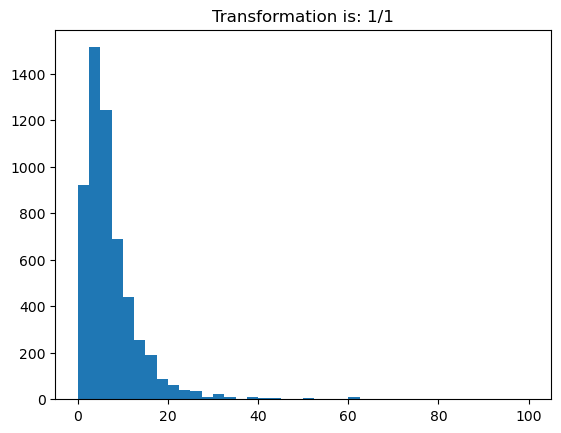

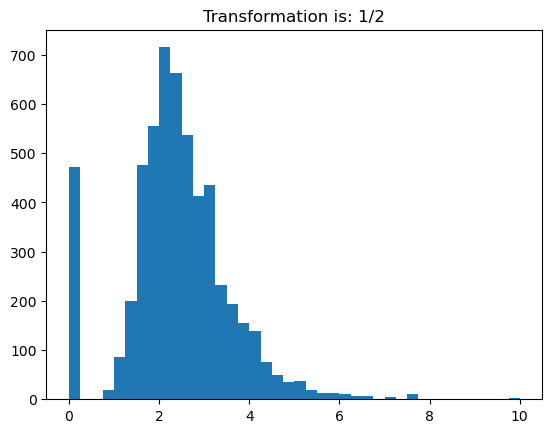

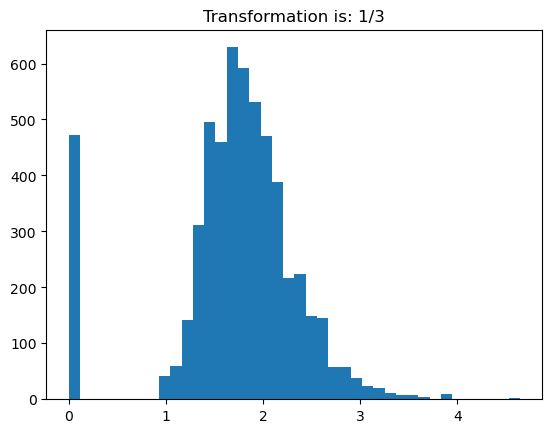

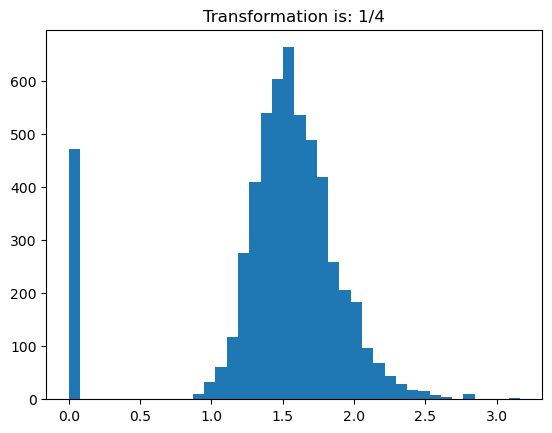

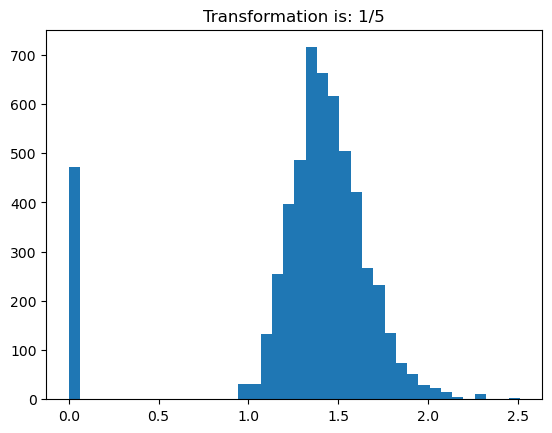

In [22]:
# Here we iterate through the numbers we want to use for the exponential in the box-cox power transformation, also apply the transformation to features
for i in [1,2,3,4,5]:
    pyplot.hist((df['punct%'])**(1/i), bins=40)
    pyplot.title("Transformation is: 1/{}".format(str(i)))
    pyplot.show()